In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv ('1-FirstTenSignals.csv')
df1.head()

,I01,I02,I03,I04,I05,I06,I07,I08,I09,I10
0,3.970588,2.333333,3.966378,3.379443,-1.891451,1.758333,-0.195833,3.284109,3.925197,1.775591
1,3.954248,2.330065,3.978866,3.378482,-1.892411,1.770833,-0.187500,3.268058,3.937008,1.771654
2,3.934641,2.297386,3.970221,3.381364,-1.890490,1.775000,-0.204167,3.264848,3.956693,1.771654
3,3.950980,2.281046,3.961575,3.381364,-1.887608,1.766667,-0.200000,3.264848,3.984252,1.783465
4,4.013072,2.290850,3.932757,3.365034,-1.883766,1.787500,-0.191667,3.258427,4.000000,1.755906


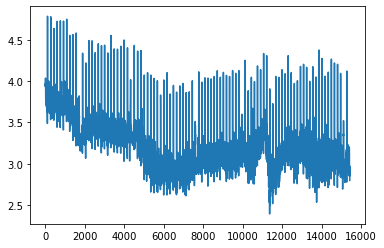

In [3]:
signal = df1['I01']
plt.plot(signal)

In [4]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

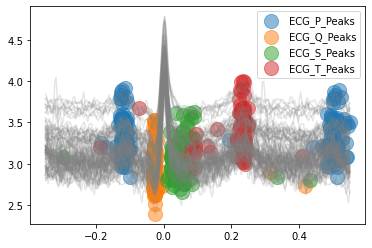

In [5]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [43]:
waves_dwt

{'ECG_P_Peaks': [77,
  239,
  400,
  566,
  723,
  884,
  1045,
  1205,
  1368,
  1522,
  1857,
  2014,
  2169,
  2331,
  2491,
  2652,
  2809,
  2966,
  3128,
  3290,
  3452,
  3623,
  3787,
  3956,
  4122,
  4472,
  4642,
  4811,
  4976,
  5146,
  5312,
  5474,
  5644,
  5804,
  5966,
  6129,
  6291,
  6448,
  6612,
  6779,
  6937,
  7097,
  7251,
  7413,
  7502,
  7736,
  7894,
  8045,
  8210,
  8365,
  8518,
  8679,
  8831,
  8987,
  9140,
  9297,
  9450,
  9609,
  9768,
  10088,
  10247,
  10406,
  10482,
  10712,
  10870,
  11025,
  11178,
  11339,
  11488,
  11642,
  11800,
  11954,
  12116,
  12270,
  12422,
  12577,
  12739,
  12893,
  13050,
  13203,
  13357,
  13516,
  13830,
  13986,
  14140,
  14305,
  14457,
  14599,
  14770,
  14926,
  15245],
 'ECG_P_Onsets': [74,
  232,
  397,
  558,
  718,
  880,
  1039,
  1200,
  1365,
  1518,
  1856,
  2007,
  2166,
  2328,
  2474,
  2650,
  2803,
  2962,
  3122,
  3283,
  3448,
  3621,
  3783,
  3951,
  4120,
  4464,
  4636,
  4808

### Calcolo la media della distanza tra gli R peaks

In [6]:
rpeaks

{'ECG_R_Peaks': array([  107,   271,   433,   595,   757,   917,  1078,  1237,  1396,
         1556,  1884,  2043,  2203,  2364,  2522,  2680,  2840,  2998,
         3158,  3321,  3485,  3651,  3820,  3988,  4157,  4502,  4672,
         4842,  5009,  5175,  5343,  5506,  5672,  5835,  5999,  6162,
         6322,  6485,  6646,  6807,  6967,  7127,  7283,  7442,  7550,
         7768,  7926,  8082,  8240,  8395,  8550,  8707,  8861,  9016,
         9173,  9328,  9483,  9641,  9797, 10119, 10275, 10433, 10515,
        10744, 10900, 11055, 11209, 11365, 11519, 11674, 11830, 11985,
        12142, 12299, 12453, 12610, 12766, 12922, 13078, 13233, 13390,
        13547, 13859, 14017, 14173, 14331, 14487, 14643, 14799, 14955,
        15271]),
 'sampling_rate': 257}

In [25]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
sum/(length - 1)/2

84.24444444444444

In [26]:
print(length)
84*2+1

91


169

In [87]:
single_hb = np.zeros([169,length])

# ogni colonna è un battito
for i in range(length):
    single_hb[:,i] = signal[picchi[i]-84:picchi[i]+85]
    

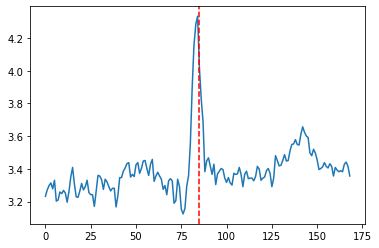

In [90]:
i = 65

plt.plot(single_hb[:,i])
plt.axvline(x = 85, color='r', linestyle='--')

In [92]:
hb_dic = {}

for i in range(length):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,3.732026,3.709150,3.637255,3.705882,3.669935,3.686275,3.764706,3.689542,3.627451,3.444444,...,3.045752,2.964052,3.081699,3.107843,3.058824,2.973856,3.088235,3.143791,3.052288,3.000000
1,3.745098,3.709150,3.666667,3.702614,3.728758,3.656863,3.781046,3.676471,3.604575,3.470588,...,3.084967,2.941176,2.924837,3.117647,3.068627,2.993464,3.084967,3.032680,2.967320,3.019608
2,3.787582,3.761438,3.705882,3.656863,3.656863,3.611111,3.738562,3.591503,3.535948,3.405229,...,3.088235,2.888889,2.790850,3.130719,3.078431,3.029412,3.084967,2.990196,3.094771,2.970588
3,3.774510,3.777778,3.683007,3.686275,3.617647,3.588235,3.705882,3.555556,3.591503,3.421569,...,3.160131,2.895425,2.915033,3.124183,2.967320,3.009804,3.065359,3.091503,3.189542,2.895425
4,3.800654,3.764706,3.643791,3.656863,3.660131,3.624183,3.683007,3.516340,3.601307,3.437908,...,3.212418,2.954248,3.042484,3.153595,2.846405,3.032680,3.065359,3.071895,3.183007,2.954248


In [95]:
df.to_csv(r'HB_I01/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

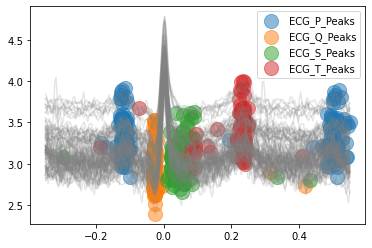

In [55]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [64]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-30, -32, -33, -29, -34, -33, -33, -32, -28, -34, -27, -29, -34,
        -33, -31, -28, -31, -32, -30, -31, -33, -28, -33, -32, -35, -30,
        -30, -31, -33, -29, -31, -32, -28, -31, -33, -33, -31, -37, -34,
        -28, -30, -30, -32, -29, -48, -32, -32, -37, -30, -30, -32, -28,
        -30, -29, -33, -31, -33, -32, -29, -31, -28, -27, -33, -32, -30,
        -30, -31, -26, -31, -32, -30, -31, -26, -29, -31, -33, -27, -29,
        -28, -30, -33, -31, -29, -31, -33, -26, -30, -44, -29, -29, -26]),
 'ECG_P_Onsets': array([-33, -39, -36, -37, -39, -37, -39, -37, -31, -38, -28, -36, -37,
        -36, -48, -30, -37, -36, -36, -38, -37, -30, -37, -37, -37, -38,
        -36, -34, -37, -33, -33, -37, -32, -35, -37, -39, -33, -41, -39,
        -30, -31, -34, -36, -32, -51, -38, -39, -40, -39, -41, -37, -31,
        -38, -36, -37, -38, -36, -34, -35, -36, -35, -29, -35, -35, -34,
        -32, -35, -32, -34, -36, -34, -35, -28, -37, -34, -36, -30, -32,
        -30, -34, 

In [96]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [100]:
df_peaks.to_csv(r'HB_I01/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats